In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tickers = [
    "RELIANCE.NS", "TCS.NS", "INFY.NS",
    "HDFCBANK.NS", "ICICIBANK.NS"
]

market_ticker = "^NSEI"

start_date = "2018-01-01"
end_date = "2023-12-31"

In [ ]:
prices = yf.download(
    tickers,
    start=start_date,
    end=end_date,
    auto_adjust=True
)["Close"]

market_prices = yf.download(
    market_ticker,
    start=start_date,
    end=end_date,
    auto_adjust=True
)["Close"]


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
prices.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1481, freq=None)

In [ ]:
common_dates = prices.index.intersection(market_prices.index)

prices = prices.loc[common_dates]
market_prices = market_prices.loc[common_dates]

In [ ]:
market_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1477 entries, 2018-01-02 to 2023-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^NSEI   1477 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [ ]:
asset_returns = np.log(prices / prices.shift(1)).dropna()
market_returns = np.log(market_prices / market_prices.shift(1)).dropna()
asset_returns

Ticker,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2018-01-03,-0.010577,0.016969,-0.008191,0.003998,0.002828
2018-01-04,0.003906,-0.000953,-0.005794,0.005994,0.006968
2018-01-05,0.001987,-0.005736,-0.003354,0.003200,0.012008
2018-01-08,-0.001611,0.003987,0.023487,0.005724,0.009327
2018-01-09,0.001665,-0.004946,0.005102,0.013266,-0.001991
...,...,...,...,...,...
2023-12-22,-0.009442,-0.010107,0.017361,0.000975,0.009591
2023-12-26,0.006919,0.000804,-0.012199,0.005055,-0.007468
2023-12-27,0.012317,0.007160,0.014883,0.003408,0.004115


In [ ]:
asset_returns.describe()

Ticker,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
count,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000
mean,0.000436,0.000808,0.000851,0.000785,0.000804
std,0.016066,0.020649,0.017776,0.018762,0.015724
min,-0.134754,-0.196597,-0.176595,-0.141032,-0.098830
25%,-0.007113,-0.009296,-0.008195,-0.009116,-0.006959
50%,0.000368,0.000387,0.001166,0.000878,0.000761
75%,0.007727,0.010803,0.009984,0.010126,0.008772
max,0.109747,0.128942,0.113627,0.137307,0.093901


In [ ]:
asset_returns.corr()

Ticker,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Ticker,,,,,
HDFCBANK.NS,1.000000,0.585811,0.312803,0.413875,0.277859
ICICIBANK.NS,0.585811,1.000000,0.282471,0.400478,0.247643
INFY.NS,0.312803,0.282471,1.000000,0.300813,0.622206
RELIANCE.NS,0.413875,0.400478,0.300813,1.000000,0.321412
TCS.NS,0.277859,0.247643,0.622206,0.321412,1.000000


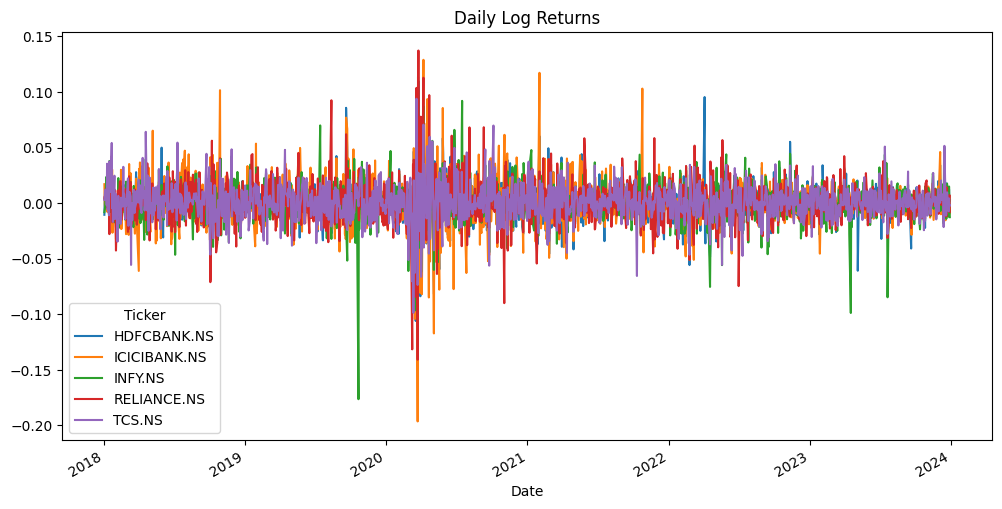

In [ ]:
asset_returns.plot(figsize=(12,6))
plt.title("Daily Log Returns")
plt.show()

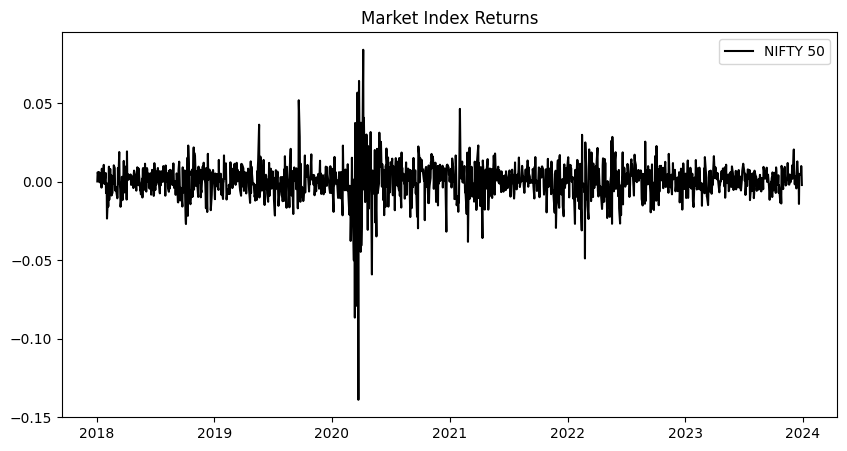

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(market_returns, label="NIFTY 50", color="black")
plt.title("Market Index Returns")
plt.legend()
plt.show()

In [ ]:
import os

os.makedirs("../data", exist_ok=True)


In [ ]:
asset_returns.to_csv("../data/asset_returns.csv")
market_returns.to_csv("../data/market_returns.csv")
prices.to_csv("../data/prices.csv")